> ### EEE3314-02: Introduction to Artificial Intelligence

# Assignment \# VI: Perceptron

<div style="text-align: right"> **Due date: Nov. 23, 2019.** </div> 
<div style="text-align: right"> **Please upload your file @ yscec by 8PM in the form of [ID_Name.zip].** </div> 
<div style="text-align: right"> Wonkyung Lee (이원경): <a href="mailto:leewk92@yonsei.ac.kr">leewk92@yonsei.ac.kr</a> </div>
<div style="text-align: right"> Geon Lee (이건): <a href="mailto:2015142195@yonsei.ac.kr"> 2015142195@yonsei.ac.kr</a> </div>

### *Assignement Instructions:*
- Write a program implementing a particular algorithm to solve a given problem.   
- <h4><span style="color:red">**Report and discuss your results. Analyze the algorithm, theoretically and empirically. **</span> </h4>

### *Collaboration policy:*
- You may discuss the questions.   
- Each student writes their own answers.   
- **Write on your homework anyone with whom you collaborate.**   
- Each student must write their own code for the programming part (**if not you will get a F grade**).

<h2><span style="color:blue">[2015142113] [JunYoung Kim]</span> </h2>

In [1]:
%load_ext autoreload
%autoreload 2

import datetime
print("This code is written at " + str(datetime.datetime.now()))

This code is written at 2019-11-22 14:30:41.221035


## Problem description

In this problem, we will implemnt an online perceptron algorithm using a MNIST dataset. The MNIST dataset contains handwritten digits that is commonly used for testing various machine learning algorithms. We use a subset of the dataset only. The training data ($\texttt{perceptron_training_data.csv}$) contains two handwritten digits, either 3 or 5, labeled as 1 or -1, respectively. We can visualize each sample using the $\texttt{imshow}$ function after reshaping $794$-dimensional vector to a $28 \times 28$ matrix.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def load_data(filepath):
    df = pd.read_csv(filepath)
    X = df.iloc[:, 1:].values
    y = df.iloc[:, :1].values.reshape(-1)
    features = df.iloc[:, 1:].columns.values

    return (X, y, features)

In [4]:
X_train, y_train, _ = load_data('perceptron_training_data.csv')
X_test, y_test, _ = load_data('perceptron_test_data.csv')

In [5]:
X_train.shape[1]

784

In [6]:
X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

In [7]:
X_train.shape

(1000, 785)

### P 1.1

(*10 points*) Visualize training samples. Use first 30 samples in training data. You should not include bias term.

In [8]:
from P06 import plot_training_samples

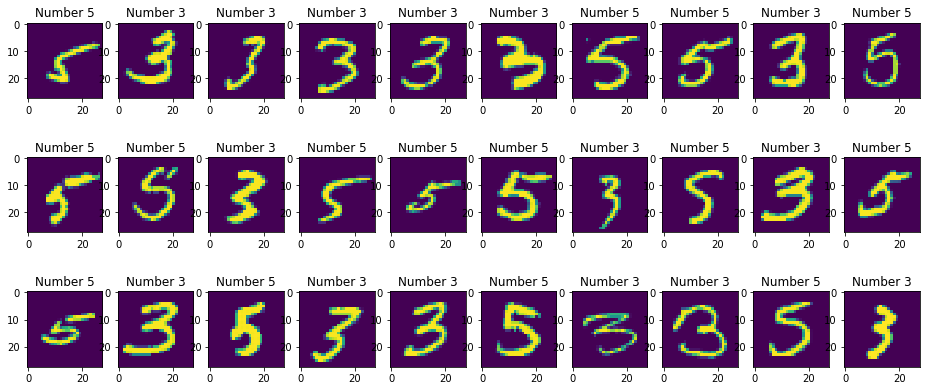

In [9]:
fig = plot_training_samples(X_train, y_train)

### P 1.2

(*50 points*) Implement an online perceptron algorithm.   
  > Initialize weights and the bias to 0.    
  > Number of epoch: 100    
  > An epoch is one complete presentation of the data set to be learned to a learning machine. For example, the total number of iterations is 500 for 5 epochs when the training dataset consists of 100 samples.

In [10]:
from P06 import perceptron

In [11]:
w = np.zeros(X['train'].shape[1])
epoch = 100

In [12]:
print(w.shape)
print(X['train'].shape)

(785,)
(1000, 785)


In [13]:
w, number_of_misclassifications, test_accuracy = perceptron(X, y, w, epoch)

- predict some labels in test data

In [14]:
def sgn(x):
    return (x >= 0)*2-1

In [15]:
print(sgn(X['test'][6].dot(w)))
print(sgn(X['test'][66].dot(w)))
print(sgn(X['test'][666].dot(w)))
print(sgn(X['test'][4].dot(w)))
print(sgn(X['test'][44].dot(w)))
print(sgn(X['test'][444].dot(w)))

1
-1
1
-1
-1
-1


### P 1.3

(*10 points*) Plot the number of missclassifications over epochs on the training set. Results are not given for this assignment.

In [16]:
from P06 import plot_number_of_misclassifications_over_epochs

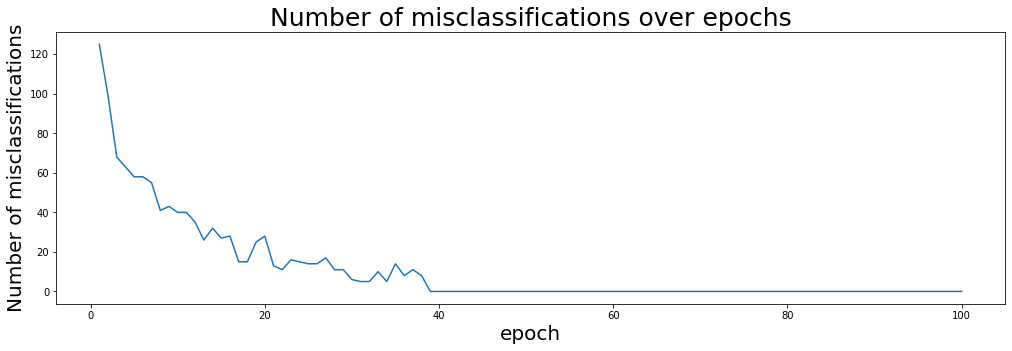

In [17]:
fig = plot_number_of_misclassifications_over_epochs(number_of_misclassifications)

### P 1.4

(*10 points*) Plot the accuracy over epochs on the test set. Results are not given for this assignment.

In [18]:
from P06 import plot_accuracy_over_epochs

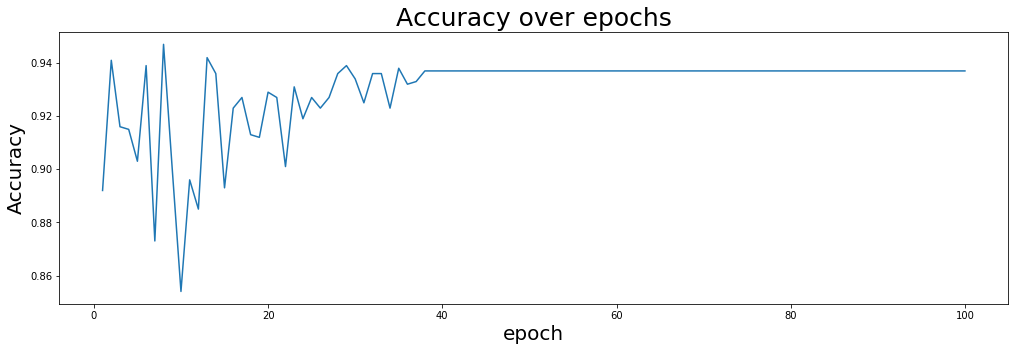

In [19]:
fig = plot_accuracy_over_epochs(test_accuracy)

## Result Analysis and Discussion (20 points)    
For result analysis and discussion, you can use all functions defined above. Also you can make your own functions or scripts.

Your answer must include the analysis about:

- Online learning
- Perceptron Algorithm

### Online learning

일반적인 Batch learning과 다르게, Online learning은 Training Data들이 모두 준비되어 있는 상태에서 시작하지 않는다. Data들이 실시간으로 들어오고, 그 들어오는 Data들에 대해 Model training을 계속해서 실시한다. 하나의 Sample data가 들어오면 그 data에 대한 결과값을 예측하고, 예측값이 실제 결과와 같은지 확인 한 후 Model의 weights를 알맞게 Update시킨다. 이 작업을 실시간으로 들어오는 Data들에 대해 차례로 수행하는 것이다. 따라서 매 순간 하나의 sample에 대해 coefficients들을 Update해야 하므로, 최적화 방법으로 주로 Stochstic gradient을 사용한다.

### Perceptron Algorithm
Perceptron은 여러 Input을 받아 하나의 Output을 출력하는 역할을 한다. Input들과 각 해당 Input에 대한 Coefficient값들로 계산을 하고, Linear Classifier처럼 그 결과값이 특정 임계치를 넘으면 1, 넘지 않으면 0이나 -1을 출력한다. 이번 경우에는 계산 결과값이 0을 넘으면 1, 넘지 않으면 -1을 출력한다. 예측 결과값과 실제 결과값이 같으면 Coefficient값은 그대로 유지하고, 다르다면 Coefficient + (예측값) * (Input sample값)으로 다음 Coefficient를 Update한다.

이번 Project는 Perceptron Model을 필기체 3과 5를 구별하도록 training하는 것이 목표이다. 필기체가 3을 의미하면 1, 5를 의미하면 -1값을 가져야한다. 위에 설명하였듯이, training sample들의 input값들에 Coefficient들을 곱한 후 더해나온 값을 가지고, 0 이상이면 1, 미만이면 -1 로 예측 결과값을 내놓았다. 이 결과값을 실제 값과 비교해 만약 이 둘이 다를경우, 다음 예측에 사용할 Coefficient값 w는 w + y * X로 update시켰다. 이것을 반복하여, 최종적으로 약 94%의 정확도로 필기체 3과 5를 구별할 수 있는 Perceptron을 완성시켰다.